Aucun chemin eulérien n'existe dans ce graphe.


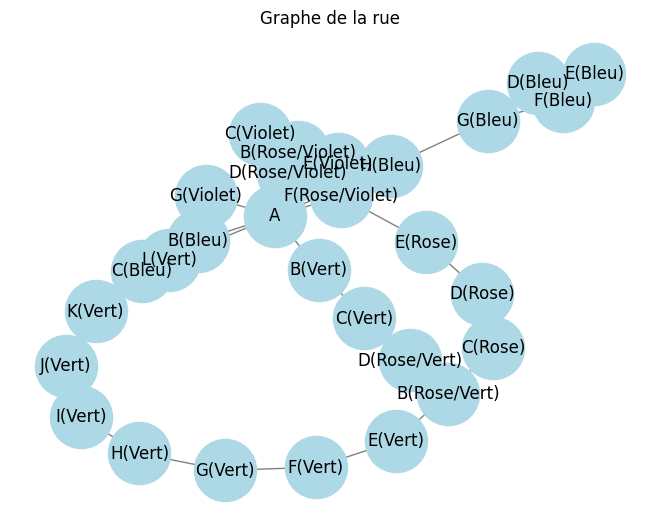

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()



users = ["A", "F(Rose/Violet)", "B(Rose/Violet)", "C(Violet)", "D(Rose/Violet)", "E(Violet)", "F(Rose/Violet)", "G(Violet)",
         "E(Rose)","D(Rose)","C(Rose)","B(Rose/Vert)","D(Rose/Vert)",
         "B(Vert)","C(Vert)","E(Vert)","F(Vert)","G(Vert)","H(Vert)","I(Vert)","J(Vert)","K(Vert)","L(Vert)",
         "H(Bleu)","G(Bleu)","F(Bleu)","E(Bleu)","D(Bleu)","C(Bleu)","B(Bleu)"]
G.add_nodes_from(users)

friendships = [("A", "F(Rose/Violet)"), ("A", "B(Vert)"), ("A", "L(Vert)"),("A", "H(Bleu)"),("A", "B(Bleu)"),("A", "D(Rose/Violet)"),("A", "G(Violet)"),
               ("F(Rose/Violet)", "B(Rose/Violet)"), ("B(Rose/Violet)", "C(Violet)"), ("B(Rose/Violet)", "D(Rose/Violet)"), ("C(Violet)", "D(Rose/Violet)"),
               ("D(Rose/Violet)", "E(Violet)"), ("E(Violet)", "F(Rose/Violet)"),("D(Rose/Violet)", "F(Rose/Violet)"),("F(Rose/Violet)","E(Rose)"),
               ("E(Rose)","D(Rose)"),("D(Rose)","C(Rose)"),("C(Rose)","B(Rose/Vert)"),
               ("B(Rose/Vert)", "D(Rose/Vert)"), ("D(Rose/Vert)", "C(Vert)"), ("C(Vert)", "B(Vert)"),
               ("L(Vert)", "K(Vert)"), ("K(Vert)", "J(Vert)"), ("J(Vert)", "I(Vert)"), ("I(Vert)", "H(Vert)"), 
               ("H(Vert)", "G(Vert)"), ("G(Vert)", "F(Vert)"), ("F(Vert)", "E(Vert)"), ("E(Vert)", "B(Rose/Vert)"),
               ("H(Bleu)", "G(Bleu)"),("G(Bleu)", "F(Bleu)"),("F(Bleu)", "E(Bleu)"),("E(Bleu)", "D(Bleu)"),
               ("D(Bleu)", "G(Bleu)"),("C(Bleu)", "B(Bleu)"),
               ]

G.add_edges_from(friendships)

def findEulerianPath(G):
    
    graph = nx.to_dict_of_lists(G)

    oddDegreeNodes = [node for node in graph if len(graph[node]) % 2 != 0]
    
    if len(oddDegreeNodes) != 2 and len(oddDegreeNodes) != 0:
        return None
    
    startNode = oddDegreeNodes[0] if oddDegreeNodes else next(iter(graph))
    
    def Hierholzer(u):
        stack = [u]
        path = []
        while stack:
            u = stack[-1]
            if graph[u]:
                v = graph[u].pop()
                graph[v].remove(u)
                stack.append(v)
            else:
                path.append(stack.pop())
        return path
    
    eulerianPath = Hierholzer(startNode)
    
    if any(graph[node] for node in graph):
        return None
    
    return eulerianPath

eulerianPath = findEulerianPath(G)

if eulerianPath:
    print("Chemin eulérien trouvé:", eulerianPath)
else:
    print("Aucun chemin eulérien n'existe dans ce graphe.")


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
plt.title("Graphe de la rue")
plt.show()